In [1]:
import time
from tqdm import tqdm
import struct

mensagem = open("input.txt", "r", encoding='ISO-8859-1').read()

rc = []
tempo = []
k = []
for K in range(9,17):
    
    start = time.time()
    dicionario = {}

    for i in range(2**8):
        dicionario[i.to_bytes(1, 'big')] = i

    newValue = 256
    comprimida = []
    new = ''
    old = ''

    for letra in tqdm(mensagem):
        new = old + letra
        if new.encode('ISO-8859-1') not in dicionario: 
            if len(dicionario) < 2**K:
                dicionario[new.encode('ISO-8859-1')] = newValue
                newValue += 1
            
            numCod = dicionario[old.encode('ISO-8859-1')]
            comprimida.append(numCod)
            
            old = letra
        else:
            old = new

    numCod = dicionario[old.encode('ISO-8859-1')]
    comprimida.append(numCod)
    
    end = time.time()
    
    outFile = open("intermediarios\intermediarioK" + str(K) + ".txt" , "wb")
    for i in comprimida:
        outFile.write(struct.pack('H', i))
        
    print('K = %d' %K)
    print('tamanho: %d -> %d' %(len(mensagem),len(comprimida)))
    CM = len(comprimida) * K / len(mensagem)
    rc.append(8/CM) 
    print('RC: %f' % (8/CM))
    tempo.append(end-start)
    print('tempo %f segundos\n' % (end-start))
    
    outFile.close()

    k.append(K)
    #MACACACACA

100%|██████████| 14884/14884 [00:00<00:00, 992827.82it/s]

K = 9
tamanho: 14884 -> 8012
RC: 1.651301
tempo 0.028924 segundos

K = 10
tamanho: 14884 -> 6031
RC: 1.974333
tempo 0.015957 segundos

K = 11
tamanho: 14884 -> 5048
RC: 2.144360
tempo 0.015987 segundos

K = 12
tamanho: 14884 -> 4630
RC: 2.143125
tempo 0.015986 segundos

K = 13
tamanho: 14884 -> 4623
RC: 1.981264
tempo 0.016983 segundos

K = 14
tamanho: 14884 -> 4623
RC: 1.839745
tempo 0.014988 segundos

K = 15
tamanho: 14884 -> 4623
RC: 1.717096
tempo 0.015930 segundos

K = 16
tamanho: 14884 -> 4623
RC: 1.609777
tempo 0.015985 segundos



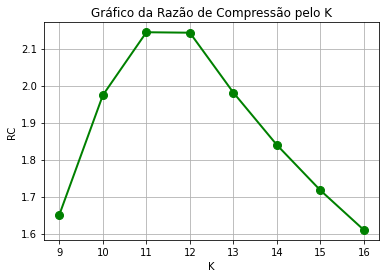

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

ax.plot(k, rc, 'go-', linewidth=2, markersize=8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set(xlabel='K', ylabel='RC', title='Gráfico da Razão de Compressão pelo K')
ax.grid()

# fig.savefig("test.png")
plt.show()

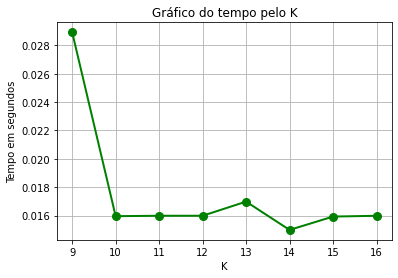

In [4]:
fig, bx = plt.subplots()

bx.plot(k, tempo, 'go-', linewidth=2, markersize=8)
bx.xaxis.set_major_locator(ticker.MultipleLocator(1))
bx.set(xlabel='K', ylabel='Tempo em segundos', title='Gráfico do tempo pelo K')
bx.grid()

plt.show()


In [8]:
import time
from tqdm import tqdm
import struct

for K in range(10,11):
    mensagem = open("intermediarios\intermediarioK" + str(K) + ".txt", "rb").read()
    mensagemInt = []
    for i in range(0, len(mensagem), 2):
        #print(str(mensagem[i]))
        arr = bytearray([mensagem[i],mensagem[i+1]])
        mensagemInt.append(struct.unpack('H', arr)[0])
        
    dicionario = {}

    for i in range(2**8):
        dicionario[i] = ''
        dicionario[i] += chr(i)  #string

    newKey = 256
        
    start = time.time()
    descomprimida = ''
    for i in tqdm(mensagemInt):
        print('decodificando:', i, ' -> ', chr(i))
        if len(dicionario) < 2**K:
            if newKey > 256:   #atualizar elemento anterior do dicionario
                dicionario[newKey-1] += dicionario[i][0]
        descomprimida += dicionario[i]
        dicionario[newKey] = dicionario[i]  #criar elemento atual do dicionario
        newKey += 1

    #print(descomprimida)
    end = time.time()

    outFile = open("saidas\saidaK" + str(K) + ".txt" , "wb")
    for i in descomprimida:
        outFile.write(struct.pack('B', ord(i)))
    
    print('K = %d' %K)
    print('tamanho: %d -> %d' %(len(mensagemInt),len(descomprimida)))
   
    tempo.append(end-start)
    print('tempo %f segundos\n' % (end-start))
    
    outFile.close()

  8%|▊         | 497/6031 [00:00<00:01, 4934.07it/s]

decodificando: 9  ->  	
decodificando: 69  ->  E
decodificando: 109  ->  m
decodificando: 32  ->   
decodificando: 117  ->  u
decodificando: 109  ->  m
decodificando: 97  ->  a
decodificando: 32  ->   
decodificando: 118  ->  v
decodificando: 105  ->  i
decodificando: 108  ->  l
decodificando: 262  ->  Ć
decodificando: 110  ->  n
decodificando: 111  ->  o
decodificando: 32  ->   
decodificando: 109  ->  m
decodificando: 101  ->  e
decodificando: 105  ->  i
decodificando: 269  ->  č
decodificando: 100  ->  d
decodificando: 262  ->  Ć
decodificando: 102  ->  f
decodificando: 108  ->  l
decodificando: 111  ->  o
decodificando: 114  ->  r
decodificando: 101  ->  e
decodificando: 115  ->  s
decodificando: 116  ->  t
decodificando: 262  ->  Ć
decodificando: 100  ->  d
decodificando: 101  ->  e
decodificando: 32  ->   
decodificando: 97  ->  a
decodificando: 108  ->  l
decodificando: 103  ->  g
decodificando: 260  ->  Ą
decodificando: 32  ->   
decodificando: 108  ->  l
decodificando: 117  ->

 24%|██▎       | 1420/6031 [00:00<00:01, 3845.06it/s]

decodificando: 262  ->  Ć
decodificando: 280  ->  Ę
decodificando: 112  ->  p
decodificando: 117  ->  u
decodificando: 283  ->  ě
decodificando: 982  ->  ϖ
decodificando: 911  ->  Ώ
decodificando: 405  ->  ƕ
decodificando: 281  ->  ę
decodificando: 481  ->  ǡ
decodificando: 108  ->  l
decodificando: 312  ->  ĸ
decodificando: 825  ->  ̹
decodificando: 465  ->  Ǒ
decodificando: 262  ->  Ć
decodificando: 280  ->  Ę
decodificando: 103  ->  g
decodificando: 105  ->  i
decodificando: 983  ->  ϗ
decodificando: 914  ->  Β
decodificando: 288  ->  Ġ
decodificando: 290  ->  Ģ
decodificando: 110  ->  n
decodificando: 961  ->  ρ
decodificando: 351  ->  ş
decodificando: 554  ->  Ȫ
decodificando: 487  ->  ǧ
decodificando: 732  ->  ˜
decodificando: 327  ->  Ň
decodificando: 622  ->  ɮ
decodificando: 551  ->  ȧ
decodificando: 357  ->  ť
decodificando: 280  ->  Ę
decodificando: 369  ->  ű
decodificando: 899  ->  ΃
decodificando: 334  ->  Ŏ
decodificando: 570  ->  Ⱥ
decodificando: 527  ->  ȏ
decodificand

 32%|███▏      | 1919/6031 [00:00<00:01, 3991.81it/s]


decodificando: 108  ->  l
decodificando: 312  ->  ĸ
decodificando: 41  ->  )
decodificando: 525  ->  ȍ
decodificando: 705  ->  ˁ
decodificando: 605  ->  ɝ
decodificando: 483  ->  ǣ
decodificando: 435  ->  Ƴ
decodificando: 654  ->  ʎ
decodificando: 450  ->  ǂ
decodificando: 726  ->  ˖
decodificando: 780  ->  ̌
decodificando: 167  ->  §
decodificando: 983  ->  ϗ
decodificando: 914  ->  Β
decodificando: 608  ->  ɠ
decodificando: 736  ->  ˠ
decodificando: 483  ->  ǣ
decodificando: 299  ->  ī
decodificando: 427  ->  ƫ
decodificando: 290  ->  Ģ
decodificando: 386  ->  Ƃ
decodificando: 816  ->  ̰
decodificando: 955  ->  λ
decodificando: 677  ->  ʥ
decodificando: 955  ->  λ
decodificando: 581  ->  Ʌ
decodificando: 533  ->  ȕ
decodificando: 581  ->  Ʌ
decodificando: 114  ->  r
decodificando: 264  ->  Ĉ
decodificando: 698  ->  ʺ
decodificando: 777  ->  ̉
decodificando: 287  ->  ğ
decodificando: 114  ->  r
decodificando: 834  ->  ͂
decodificando: 766  ->  ˾
decodificando: 287  ->  ğ
decodificand

 48%|████▊     | 2918/6031 [00:00<00:00, 4238.59it/s]

364  ->  Ŭ
decodificando: 319  ->  Ŀ
decodificando: 571  ->  Ȼ
decodificando: 369  ->  ű
decodificando: 98  ->  b
decodificando: 319  ->  Ŀ
decodificando: 108  ->  l
decodificando: 334  ->  Ŏ
decodificando: 692  ->  ʴ
decodificando: 359  ->  ŧ
decodificando: 814  ->  ̮
decodificando: 476  ->  ǜ
decodificando: 489  ->  ǩ
decodificando: 271  ->  ď
decodificando: 273  ->  đ
decodificando: 733  ->  ˝
decodificando: 291  ->  ģ
decodificando: 319  ->  Ŀ
decodificando: 601  ->  ə
decodificando: 288  ->  Ġ
decodificando: 33  ->  !
decodificando: 33  ->  !
decodificando: 33  ->  !
decodificando: 324  ->  ń
decodificando: 83  ->  S
decodificando: 642  ->  ʂ
decodificando: 402  ->  ƒ
decodificando: 280  ->  Ę
decodificando: 297  ->  ĩ
decodificando: 992  ->  Ϡ
decodificando: 645  ->  ʅ
decodificando: 968  ->  ψ
decodificando: 406  ->  Ɩ
decodificando: 681  ->  ʩ
decodificando: 101  ->  e
decodificando: 939  ->  Ϋ
decodificando: 410  ->  ƚ
decodificando: 794  ->  ̚
decodificando: 437  ->  Ƶ
decodi

 65%|██████▍   | 3917/6031 [00:00<00:00, 4392.62it/s]

 541  ->  ȝ
decodificando: 328  ->  ň
decodificando: 428  ->  Ƭ
decodificando: 331  ->  ŋ
decodificando: 546  ->  Ȣ
decodificando: 393  ->  Ɖ
decodificando: 549  ->  ȥ
decodificando: 551  ->  ȧ
decodificando: 553  ->  ȩ
decodificando: 299  ->  ī
decodificando: 556  ->  Ȭ
decodificando: 558  ->  Ȯ
decodificando: 383  ->  ſ
decodificando: 349  ->  ŝ
decodificando: 351  ->  ş
decodificando: 563  ->  ȳ
decodificando: 392  ->  ƈ
decodificando: 739  ->  ˣ
decodificando: 567  ->  ȷ
decodificando: 815  ->  ̯
decodificando: 570  ->  Ⱥ
decodificando: 661  ->  ʕ
decodificando: 948  ->  δ
decodificando: 576  ->  ɀ
decodificando: 369  ->  ű
decodificando: 578  ->  ɂ
decodificando: 924  ->  Μ
decodificando: 388  ->  Ƅ
decodificando: 582  ->  Ɇ
decodificando: 766  ->  ˾
decodificando: 585  ->  ɉ
decodificando: 663  ->  ʗ
decodificando: 569  ->  ȹ
decodificando: 298  ->  Ī
decodificando: 284  ->  Ĝ
decodificando: 592  ->  ɐ
decodificando: 615  ->  ɧ
decodificando: 595  ->  ɓ
decodificando: 597  ->  ɕ


 82%|████████▏ | 4916/6031 [00:01<00:00, 4446.57it/s]

decodificando: 784  ->  ̐
decodificando: 512  ->  Ȁ
decodificando: 54  ->  6
decodificando: 785  ->  ̑
decodificando: 593  ->  ɑ
decodificando: 512  ->  Ȁ
decodificando: 784  ->  ̐
decodificando: 269  ->  č
decodificando: 766  ->  ˾
decodificando: 285  ->  ĝ
decodificando: 815  ->  ̯
decodificando: 258  ->  Ă
decodificando: 956  ->  μ
decodificando: 963  ->  σ
decodificando: 588  ->  Ɍ
decodificando: 321  ->  Ł
decodificando: 512  ->  Ȁ
decodificando: 285  ->  ĝ
decodificando: 10  ->  

decodificando: 34  ->  "
decodificando: 551  ->  ȧ
decodificando: 652  ->  ʌ
decodificando: 115  ->  s
decodificando: 34  ->  "
decodificando: 914  ->  Β
decodificando: 784  ->  ̐
decodificando: 487  ->  ǧ
decodificando: 474  ->  ǚ
decodificando: 117  ->  u
decodificando: 343  ->  ŗ
decodificando: 650  ->  ʊ
decodificando: 487  ->  ǧ
decodificando: 408  ->  Ƙ
decodificando: 622  ->  ɮ
decodificando: 342  ->  Ŗ
decodificando: 161  ->  ¡
decodificando: 103  ->  g
decodificando: 722  ->  ˒
decodificando: 3

 90%|████████▉ | 5415/6031 [00:01<00:00, 4452.90it/s]


decodificando: 399  ->  Ə
decodificando: 332  ->  Ō
decodificando: 1004  ->  Ϭ
decodificando: 1009  ->  ϱ
decodificando: 945  ->  α
decodificando: 477  ->  ǝ
decodificando: 369  ->  ű
decodificando: 948  ->  δ
decodificando: 369  ->  ű
decodificando: 950  ->  ζ
decodificando: 809  ->  ̩
decodificando: 114  ->  r
decodificando: 807  ->  ̧
decodificando: 800  ->  ̠
decodificando: 498  ->  ǲ
decodificando: 408  ->  Ƙ
decodificando: 650  ->  ʊ
decodificando: 1009  ->  ϱ
decodificando: 945  ->  α
decodificando: 960  ->  π
decodificando: 916  ->  Δ
decodificando: 964  ->  τ
decodificando: 650  ->  ʊ
decodificando: 784  ->  ̐
decodificando: 968  ->  ψ
decodificando: 733  ->  ˝
decodificando: 583  ->  ɇ
decodificando: 972  ->  ό
decodificando: 179  ->  ³
decodificando: 974  ->  ώ
decodificando: 1011  ->  ϳ
decodificando: 259  ->  ă
decodificando: 902  ->  Ά
decodificando: 978  ->  ϒ
decodificando: 110  ->  n
decodificando: 980  ->  ϔ
decodificando: 780  ->  ̌
decodificando: 167  ->  §
decodif

100%|██████████| 6031/6031 [00:01<00:00, 4397.84it/s]

581  ->  Ʌ
decodificando: 533  ->  ȕ
decodificando: 581  ->  Ʌ
decodificando: 114  ->  r
decodificando: 264  ->  Ĉ
decodificando: 698  ->  ʺ
decodificando: 777  ->  ̉
decodificando: 287  ->  ğ
decodificando: 114  ->  r
decodificando: 834  ->  ͂
decodificando: 766  ->  ˾
decodificando: 287  ->  ğ
decodificando: 681  ->  ʩ
decodificando: 561  ->  ȱ
decodificando: 259  ->  ă
decodificando: 328  ->  ň
decodificando: 499  ->  ǳ
decodificando: 562  ->  Ȳ
decodificando: 487  ->  ǧ
decodificando: 408  ->  Ƙ
decodificando: 622  ->  ɮ
decodificando: 275  ->  ē
decodificando: 369  ->  ű
decodificando: 551  ->  ȧ
decodificando: 652  ->  ʌ
decodificando: 961  ->  ρ
decodificando: 581  ->  Ʌ
decodificando: 417  ->  ơ
decodificando: 492  ->  Ǭ
decodificando: 729  ->  ˙
decodificando: 114  ->  r
decodificando: 10  ->  

decodificando: 10  ->  

decodificando: 463  ->  Ǐ
decodificando: 279  ->  ė
decodificando: 261  ->  ą
decodificando: 982  ->  ϖ
decodificando: 911  ->  Ώ
decodificando: 784  ->  ̐
dec